## Project:- Amazon's Alexa Product Reviews with NLP 

NLP, or natural language processing is a field concerned with the ability to understand, analyze, manipulate and potentially generate human language.

In the following lines, it will be presented the analysis of Amazon Alexa product reviews using natural language processing techniques

importing data

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

loading dataset

In [159]:
df=pd.read_csv('amazon_alexa.tsv', delimiter = '\t')

In [160]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


#### any missing values?

In [13]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [15]:
df.rating.value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

## Data Visualization

### Ratings

<AxesSubplot:xlabel='rating', ylabel='count'>

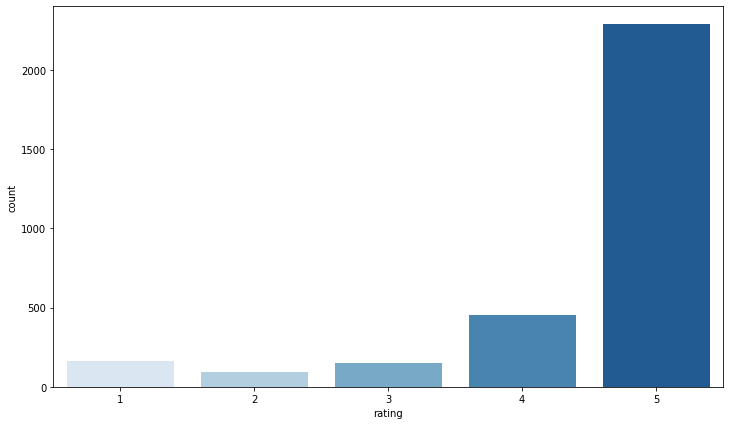

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(x='rating',data=df,palette='Blues')

#### How much feedback affect on Rating

<AxesSubplot:xlabel='rating', ylabel='count'>

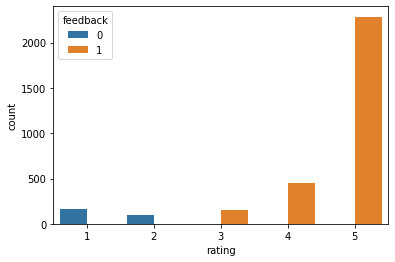

In [32]:
sns.countplot(x='rating',data=df,hue='feedback')

<AxesSubplot:xlabel='rating', ylabel='Count'>

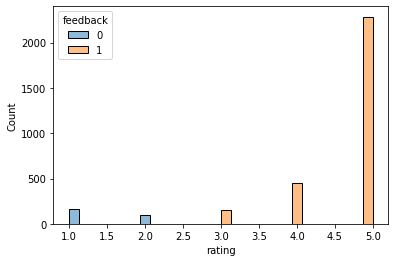

In [36]:
sns.histplot(x='rating',data=df,hue='feedback')

In [37]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### variations

In [42]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

<AxesSubplot:xlabel='variation', ylabel='count'>

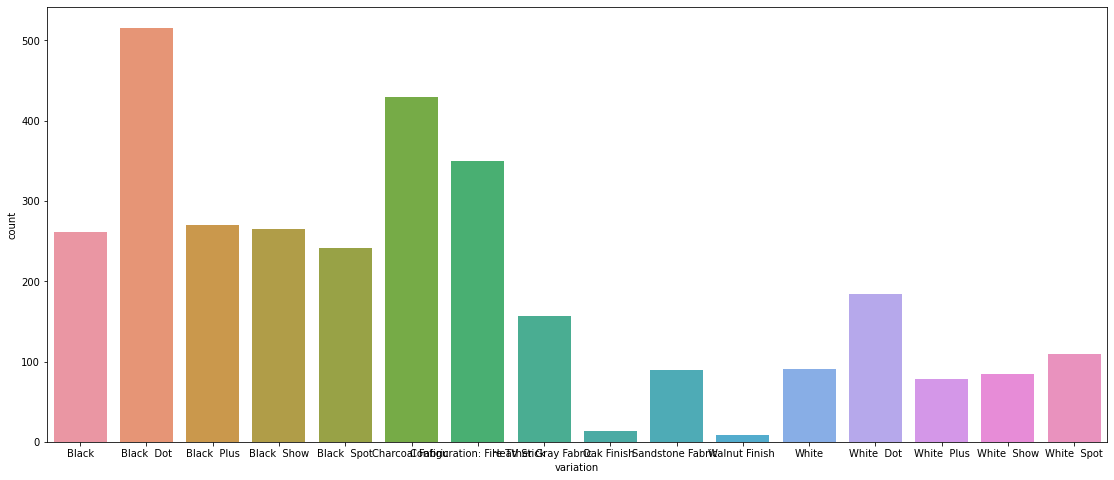

In [47]:
plt.figure(figsize=(19,8))
sns.countplot(x='variation',data=df.sort_values('variation'))

In [49]:
df.groupby('rating').sum()

,feedback
rating,
1,0
2,0
3,152
4,455
5,2286


In [50]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [55]:
df['verified_reviews'].value_counts()

                                                                                                                                                                                                                                                                                                79
Love it!                                                                                                                                                                                                                                                                                        22
Love it                                                                                                                                                                                                                                                                                         19
Great product                                                                                                                  

In [63]:
df['length']=df['verified_reviews'].apply(len)

In [64]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<AxesSubplot:xlabel='length', ylabel='Count'>

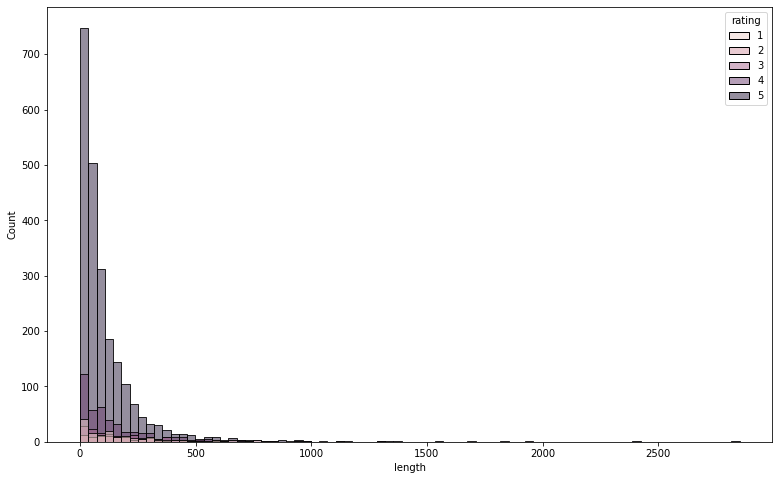

In [74]:
plt.figure(figsize=(13,8))
sns.histplot(data=df,x='length',hue='rating',bins=80)

<Figure size 864x576 with 0 Axes>

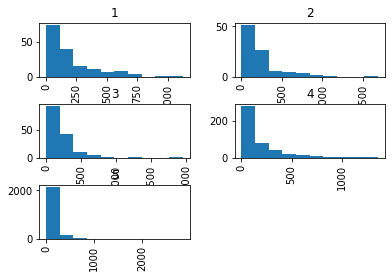

In [72]:
plt.figure(figsize=(12,8))
df.hist(column='length',by='rating')
plt.show()

In [76]:
df.corr()['rating']

rating      1.000000
feedback    0.861968
length     -0.193067
Name: rating, dtype: float64

In [161]:
dataset1=df[df['rating']==1]

In [162]:
dataset1['rating'].value_counts()

1    161
Name: rating, dtype: int64

In [163]:
dataset2=df[df['rating']==2]
dataset3=df[df['rating']==3]
dataset4=df[df['rating']==4]
dataset5=df[df['rating']==5]

In [164]:
dataset=pd.concat([dataset1,dataset2,dataset3,dataset4,dataset5])

In [165]:
dataset.head()

,rating,date,variation,verified_reviews,feedback
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
341,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0
350,1,31-Jul-18,Black,Item no longer works after just 5 months of us...,0
361,1,29-Jul-18,Black,This thing barely works. You have to select 3r...,0


## Text Preprocessing

1.Removing stopwords and punctuations

2.Vectorization

3.BOW

4.TF-IDF

In [79]:
import string
from nltk.corpus import stopwords

In [78]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [82]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Creating function which returns clean text

In [171]:
def text_process(mess):
    non_punc=[char for char in mess if char not in string.punctuation]
    
    nopunc=''.join(non_punc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [172]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [173]:
df['verified_reviews']=df['verified_reviews'][:10].apply(text_process)


In [102]:
#df['length']=df['verified_reviews'].apply(len)
#df=df.drop(['length'],axis=1)
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,"[Love, Echo]",1
1,5,31-Jul-18,Charcoal Fabric,[Loved],1
2,4,31-Jul-18,Walnut Finish,"[Sometimes, playing, game, answer, question, c...",1
3,5,31-Jul-18,Charcoal Fabric,"[lot, fun, thing, 4, yr, old, learns, dinosaur...",1
4,5,31-Jul-18,Charcoal Fabric,[Music],1


In [109]:
df['verified_reviews']=df['verified_reviews'].apply(text_process)


In [106]:
df['verified_reviews'].dtype

dtype('O')

In [156]:
df.tail(10)

,rating,date,variation,verified_reviews,feedback
3140,4,30-Jul-18,White Dot,NaN,1
3141,3,30-Jul-18,Black Dot,NaN,1
3142,4,30-Jul-18,White Dot,NaN,1
3143,5,30-Jul-18,Black Dot,NaN,1
3144,5,30-Jul-18,Black Dot,NaN,1
3145,5,30-Jul-18,Black Dot,NaN,1
3146,5,30-Jul-18,Black Dot,NaN,1
3147,5,30-Jul-18,Black Dot,NaN,1
3148,5,30-Jul-18,White Dot,NaN,1
3149,4,29-Jul-18,Black Dot,NaN,1


## Vectorization

In [169]:
new=''.join(dataset['verified_reviews'][0])

In [170]:
new.lower()

'love my echo!'

In [140]:
df.shape

(3150, 5)

In [167]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

In [168]:
data_clean_vectorize =  vectorizer.fit_transform(dataset['verified_reviews'])

In [174]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [178]:
print(data_clean_vectorize.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [180]:
X=data_clean_vectorize
y=dataset['rating'].values

In [181]:
y

array([1, 1, 1, ..., 5, 5, 5], dtype=int64)

### Train Test Split

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [184]:
X_train.shape

(2205, 4044)

In [186]:
X_test.shape

(945, 4044)

## Model Building

### Naive Bayes 

In [192]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [193]:
y_pred=nb.predict(X_test)

In [194]:
y_pred

array([5, 4, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5,
       5, 5, 4, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 4, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 5, 5, 5, 5, 5, 4, 5, 1,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5,
       5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5,

### Model Evaluation

In [195]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [197]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.88      0.13      0.23        52
           2       0.00      0.00      0.00        34
           3       1.00      0.04      0.07        52
           4       0.40      0.30      0.34       129
           5       0.79      0.98      0.88       678

   micro avg       0.75      0.75      0.75       945
   macro avg       0.61      0.29      0.31       945
weighted avg       0.73      0.75      0.69       945



In [198]:
print(accuracy_score(y_pred,y_test))

0.7523809523809524


<AxesSubplot:>

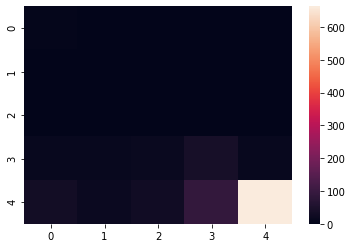

In [199]:
sns.heatmap(confusion_matrix(y_pred,y_test))

### K Nearest Neighbors classifier

In [203]:
from sklearn.neighbors import KNeighborsClassifier

In [204]:
knn=KNeighborsClassifier(n_neighbors=4)


In [205]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [208]:
y_pred_knn=knn.predict(X_test)

In [210]:
#y_pred

In [212]:
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           1       0.12      0.27      0.16        22
           2       0.00      0.00      0.00         1
           3       0.08      0.20      0.11        20
           4       0.25      0.31      0.28       102
           5       0.90      0.77      0.83       800

   micro avg       0.69      0.69      0.69       945
   macro avg       0.27      0.31      0.28       945
weighted avg       0.80      0.69      0.74       945



#### Choosing K value

In [213]:
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

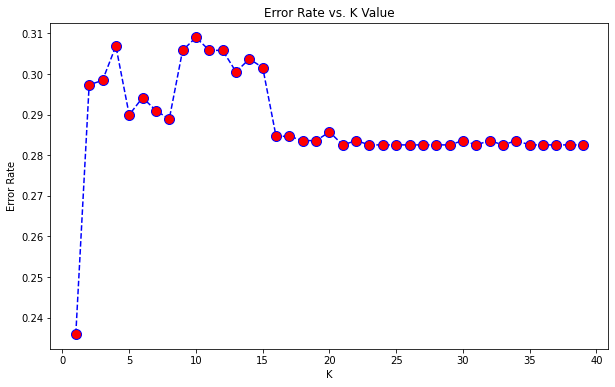

In [214]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [217]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [218]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[  4   1   3   1  43]
 [  0   0   1   9  24]
 [  1   0   3   3  45]
 [  2   0   8  21  98]
 [  3   0   8  28 639]]


              precision    recall  f1-score   support

           1       0.40      0.08      0.13        52
           2       0.00      0.00      0.00        34
           3       0.13      0.06      0.08        52
           4       0.34      0.16      0.22       129
           5       0.75      0.94      0.84       678

   micro avg       0.71      0.71      0.71       945
   macro avg       0.32      0.25      0.25       945
weighted avg       0.62      0.71      0.64       945

